<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Filter_methods_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas matplotlib seaborn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold


In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


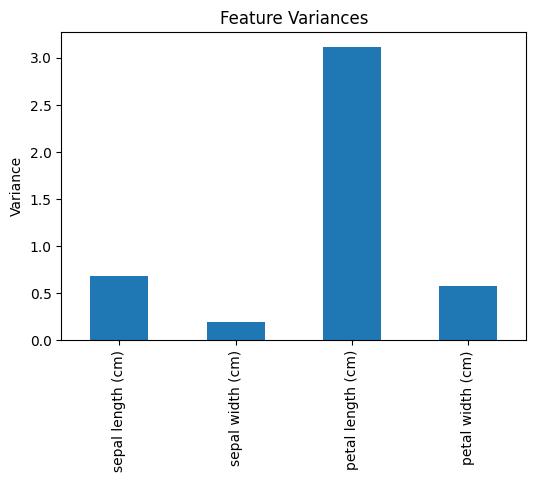

In [3]:
variances = X.var()
plt.figure(figsize=(6,4))
variances.plot(kind='bar', title='Feature Variances')
plt.ylabel('Variance')
plt.show()

In [4]:
for thresh in [0.2, 0.6, 0.8]:
  sel = VarianceThreshold(threshold=thresh)
  X_sel = sel.fit_transform(X)
  kept = X.columns[sel.get_support()]
  print(f"Threshold={thresh}: kept features →", list(kept))

Threshold=0.2: kept features → ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
Threshold=0.6: kept features → ['sepal length (cm)', 'petal length (cm)']
Threshold=0.8: kept features → ['petal length (cm)']


In [5]:
removed = set(X.columns) - set(kept)
print("\nRemoved features (for threshold=0.8):", removed)



Removed features (for threshold=0.8): {'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)'}


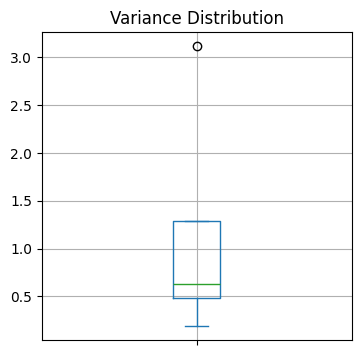

In [6]:
plt.figure(figsize=(4,4))
variances.plot(kind='box', title="Variance Distribution")
plt.grid(True)
plt.show()

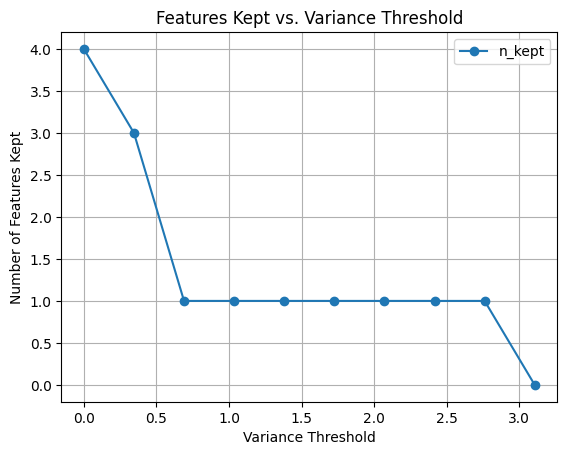

In [9]:
max_var = variances.max() - 0.01  # slightly below max to avoid exceeding any feature's variance
results = []

for t in np.linspace(0, max_var, 10):
    sel = VarianceThreshold(threshold=t)
    try:
        X_sel = sel.fit_transform(X)
        n_kept = X_sel.shape[1]
    except ValueError:
        n_kept = 0  # no features passed the threshold
    results.append((t, n_kept))

# Plotting the number of features kept vs. threshold
pd.DataFrame(results, columns=['threshold', 'n_kept']).plot(x='threshold', y='n_kept', marker='o')
plt.title("Features Kept vs. Variance Threshold")
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Features Kept")
plt.grid(True)
plt.show()



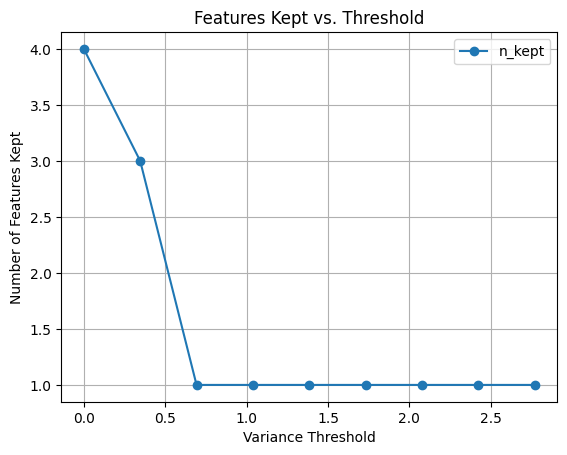

In [12]:
results = []

# Only use thresholds that are strictly less than the maximum variance
thresholds = [t for t in np.linspace(0, variances.max(), 10) if t < variances.max()]

for t in thresholds:
    sel = VarianceThreshold(threshold=t)
    results.append((t, sel.fit(X).get_support().sum()))

pd.DataFrame(results, columns=['threshold','n_kept']).plot(x='threshold', y='n_kept', marker='o')
plt.title("Features Kept vs. Threshold")
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Features Kept")
plt.grid(True)
plt.show()

